<a href="https://colab.research.google.com/github/blakelobato/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Blake_Lobato_133A_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
### YOUR CODE STARTS HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats


In [0]:
def bayes(prior,pos, dgp):
  numerator = dgp * prior
  rate_drunk = 1 - prior
  denominator = numerator + (pos*rate_drunk)
  return numerator/denominator

In [0]:
prob_drunkp = .001
prob_pos = .08
prob_dgp = 1

In [5]:
drunk = bayes(prob_drunkp, prob_pos, prob_dgp)
drunk

0.012357884330202669

In [0]:
def repeated(prior, pos, dgp, num):
  priors = 0
  while num > 0:
    prior = bayes(prior, pos, dgp)
    num -= 1
    print(prior)

In [7]:
repeated(0.001, .08, 1, 10)

0.012357884330202669
0.13525210993291495
0.6615996951348605
0.9606895076105054
0.9967371577896734
0.9997381867081508
0.9999790498904363
0.9999983239589307
0.9999998659165077
0.9999999892733192


# Part 2 

Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
cols1 = ['Class Name','handicapped-infants','water-project-cost-sharing', 'adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']


In [9]:
hv = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=cols1)
hv.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [10]:
hv = hv.replace('n', 0)
hv = hv.replace('y', 1)
hv = hv.replace('?', None)
hv.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
handicap = hv['handicapped-infants']

In [12]:
stats.bayes_mvs(handicap, alpha=0.9)

(Mean(statistic=0.4413793103448276, minmax=(0.4020899550520905, 0.4806686656375646)),
 Variance(statistic=0.24827586206896757, minmax=(0.2217984063432448, 0.2773580314098256)),
 Std_dev(statistic=0.49798461043835224, minmax=(0.470954781633274, 0.5266479197811624)))

In [13]:
dem = hv[hv['Class Name'] == 'democrat']
dem.shape

(267, 17)

In [14]:
rep = hv[hv['Class Name'] == 'republican']
rep.head()
rep.shape

(168, 17)

In [15]:
dem.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1


In [0]:
dem_handicap = dem['handicapped-infants']

In [36]:
democrats,_,_ = stats.bayes_mvs(dem_handicap, alpha=0.9)
democrats

Mean(statistic=0.599250936329588, minmax=(0.5496554421708969, 0.6488464304882791))

In [0]:
rep_handicap = rep['handicapped-infants']

In [55]:
republicans,_,_ = stats.bayes_mvs(rep_handicap, alpha=0.9)
republicans

Mean(statistic=0.19047619047619047, minmax=(0.1402164687806205, 0.2407359121717604))

In [24]:
total,_,_ = stats.bayes_mvs(hv['handicapped-infants'], alpha=.9)
total

Mean(statistic=0.4413793103448276, minmax=(0.4020899550520905, 0.4806686656375646))

In [0]:
def confidence_interval(data, alpha=.9):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + alpha) / 2.0, n-1)
  interval = stderr * t
  return (mean , mean-interval, mean+interval)

In [30]:
confidence_interval(hv['handicapped-infants'],alpha=.9)

(0.4413793103448276, 0.40208995505209055, 0.4806686656375646)

In [32]:
confidence_interval(dem_handicap, alpha=.9)

(0.599250936329588, 0.549655442170897, 0.6488464304882791)

In [33]:
confidence_interval(rep_handicap, alpha=.9)

(0.19047619047619047, 0.14021646878062052, 0.2407359121717604)

# Frequentist CI
- Democrats [mean: (0.599250936329588, min: 0.549655442170897, max: 0.6488464304882791)]
- Republicans [mean: 0.19047619047619047, min: 0.14021646878062052, max: 0.2407359121717604)]
- Total Handicapped Infants[mean: (0.4413793103448276, min: 0.40208995505209055, max: 0.4806686656375646)]

# Bayesian CI
- Democrats: Mean(statistic=0.599250936329588, minmax=(0.5496554421708969, 0.6488464304882791))
- Republicans: Mean(statistic=0.19047619047619047, minmax=(0.1402164687806205, 0.2407359121717604))
- Total Handicapped Infants: statistic=0.4413793103448276, minmax=(0.4020899550520905, 0.4806686656375646)

# Answer

Based on the above data, the confidence intervals are the same.

([array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0., 

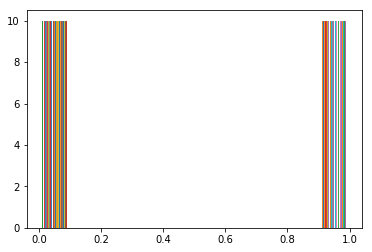

In [40]:
plt.hist(dem_handicap, alpha=0.9, density=True)
plt.hist(rep_handicap, alpha=0.9, density=True);
plt.hist(hv['handicapped-infants'], alpha=0.9, density=True);


In [90]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np

#Function: CI_prinout, a function that outputs a number overlay expressing a sample's Confidence Interval
#Inputs: a dataframe with one column of values. Optional paramater interval for the size of the confidence interval (default is 0.95). Option parameter method that specifies whether the confidence interval will be calculating using the t distribution or a z/normal distribution.
#Outputs: a matplotlib text chart with the % confidence interval and the lower and upper bounds
def CI_printout(series, interval = 0.95, method = 't'):
  mean_val = series.mean()
  n = series.count()
  stdev = series.std()
  mean_ci,_,_= stats.bayes_mvs(rep_handicap, alpha=0.9)
  stat = mean_ci.statistic
  lower_bound = mean_ci.minmax[0]
  upper_bound = mean_ci.minmax[1]
 
  fig = plt.figure()
  plt.axis('off')
  plt.gcf().set_size_inches(8, 2)
  plt.xticks([])
  plt.yticks([])

  plt.text(.5, .75, str(round(interval * 100))+ '% Confidence Interval', fontsize=25, color='black', ha='center')
  plt.text(.5, .35, str(round(lower_bound[0],2)) + ' to ' + str(round(upper_bound[0],2)), fontsize=25, color='black', ha='center')

  return plt

# Use Periscope to visualize a dataframe or an image by passing data to periscope.output()
periscope.output(CI_printout(df))

NameError: ignored

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np

In [0]:
def plot_mean_and_CI( mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb, color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

In [87]:
fig = plt.figure(1, figsize=(7, 2.5))
plot_mean_and_CI(democrats, democrats.minmax[0], democrats.minmax[1], color_mean='k', color_shading='k')
plot_mean_and_CI(republicans, republicans.minmax[0], republicans.minmax[1], color_mean='b', color_shading='b')
plot_mean_and_CI(total, total.minmax[0], total.minmax[1], color_mean='g--', color_shading='g')

TypeError: ignored

<Figure size 504x180 with 0 Axes>

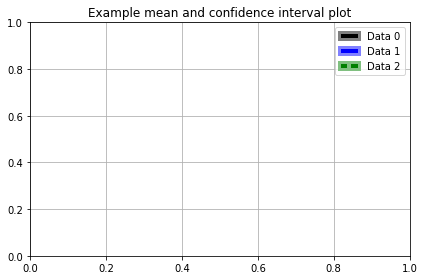

In [72]:
class LegendObject(object):
    def __init__(self, facecolor='red', edgecolor='white', dashed=False):
        self.facecolor = facecolor
        self.edgecolor = edgecolor
        self.dashed = dashed
 
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle(
            # create a rectangle that is filled with color
            [x0, y0], width, height, facecolor=self.facecolor,
            # and whose edges are the faded color
            edgecolor=self.edgecolor, lw=3)
        handlebox.add_artist(patch)
 
        # if we're creating the legend for a dashed line,
        # manually add the dash in to our rectangle
        if self.dashed:
            patch1 = mpatches.Rectangle(
                [x0 + 2*width/5, y0], width/5, height, facecolor=self.edgecolor,
                transform=handlebox.get_transform())
            handlebox.add_artist(patch1)
 
        return patch
 
bg = np.array([1, 1, 1])  # background of the legend is white
colors = ['black', 'blue', 'green']
# with alpha = .5, the faded color is the average of the background and color
colors_faded = [(np.array(cc.to_rgb(color)) + bg) / 2.0 for color in colors]
 
plt.legend([0, 1, 2], ['Data 0', 'Data 1', 'Data 2'],
           handler_map={
               0: LegendObject(colors[0], colors_faded[0]),
               1: LegendObject(colors[1], colors_faded[1]),
               2: LegendObject(colors[2], colors_faded[2], dashed=True),
            })
 
plt.title('Example mean and confidence interval plot')
plt.tight_layout()
plt.grid()
plt.show()

array([0.93615505, 0.15638613, 0.18902789, 0.81646079, 0.19093851,
       0.67417823, 0.40084809, 0.47127975, 0.12946206, 0.24994993,
       0.69388462, 0.30279602, 0.02468434, 0.54496488, 0.11517224,
       0.90480099, 0.49923818, 0.61608803, 0.52223422, 0.40478096,
       0.69378216, 0.42009418, 0.68894408, 0.97021812, 0.40176724,
       0.0646561 , 0.91877819, 0.25254092, 0.7956598 , 0.78742539,
       0.15246992, 0.27929458, 0.21703034, 0.78858701, 0.469719  ,
       0.54381797, 0.65301644, 0.81042266, 0.26015666, 0.6160821 ,
       0.48592942, 0.41975365, 0.39398273, 0.50322589, 0.80292227,
       0.65841389, 0.51397356, 0.15757204, 0.38433481, 0.66721796])

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)